In [12]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator

In [ ]:
shots = 8192

def deutsch_algorithm(oracle):
    """
    Implementación del algoritmo de Deutsch utilizando el oracle dado.
    
    Parámetros: oracle (QuantumCircuit): Un circuito cuántico que implementa la función f(x).
    
    Retorna: str: 'constant' si f(x) es una función constante, 'balanced' si f(x) es una función balanceada.
    """
    qubit_x = QuantumRegister(1, name='qubit_x') 
    qubit_y = QuantumRegister(1, name='qubit_y')

    measure_x = ClassicalRegister(1, name='measure_x')
    measure_Fx = ClassicalRegister(1, name='measure_Fx')

    # Creación de un circuito cuántico de 2 qubits
    qc = QuantumCircuit(qubit_x, qubit_y, measure_x)
    
    # Inicialización de los qubits de entrada
    qc.x(1)  # Se aplica la compuerta X al segundo qubit
    qc.barrier()
    
    qc.h([0, 1])  # Se aplica la compuerta Hadamard a ambos qubits
    
    # Se agrega al circuito cuántico, la "caja-negra" del oracle.
    qc.append(oracle.to_gate(), [0, 1])
    
    # Se aplica nuevamente Hadamard al primer qubit 
    qc.h(0)
    
    # Se mide el primer qubit (qubit_x)
    qc.barrier()
    qc.measure(qubit_x, measure_x)

    # Se mide el segundo qubit asociado a y + f(x) (qubit_y)
    qc_copy = qc.copy()
    qc_copy.add_register(measure_Fx)
    qc_copy.measure(qubit_y, measure_Fx)

    display(qc_copy.draw('mpl'))

    # Simulación del circuito cuántico
    simulator = AerSimulator()

    # Resultados de evaluación del qubit_x
    result_x = simulator.run(qc.decompose(reps=1), shots=shots).result()
    counts_x = result_x.get_counts()

    # Resultados de evaluación del los dos qubits (qubit_y, qubit_x)
    results = simulator.run(qc_copy.decompose(reps=1), shots=shots).result()
    total_counts = results.get_counts()

    print(total_counts)

    # Se muestra el resultado de la medición
    display(plot_distribution(total_counts))
    
    # Se determina si f(x) es constante o balanceada
    return 'constante' if '0' in counts_x and counts_x['0'] > counts_x.get('1', 0) else 'balanceada'


In [14]:
# Definición de funciones oracle

def constant_oracle():
    """ Crea un oracle cuántico para una función constante f(x) = 0. """
    oracle = QuantumCircuit(2, name="  f(x) = 0  ")
    return oracle

def balanced_oracle():
    """ Crea un oracle cuántico para una función balanceada f(x) = x. """
    oracle = QuantumCircuit(2, name="  f(x) = x  ")
    oracle.cx(0, 1)
    return oracle


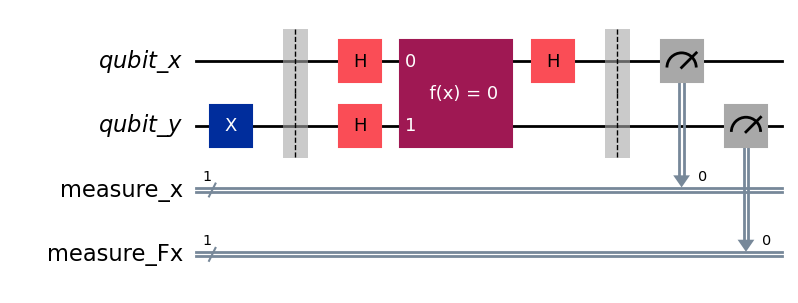

{'0 0': 4117, '1 0': 4075}


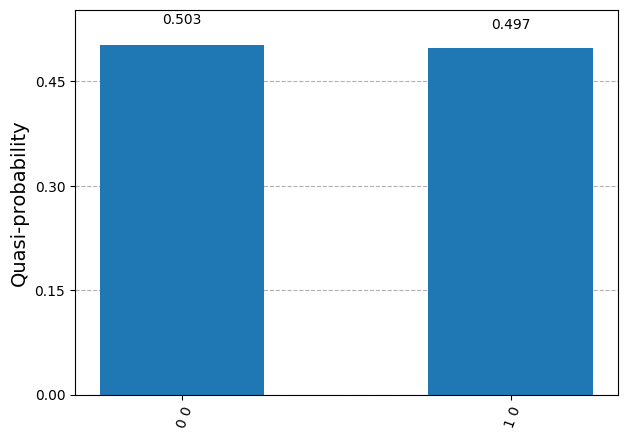

Probando un oracle constante: La función f(x) es constante .


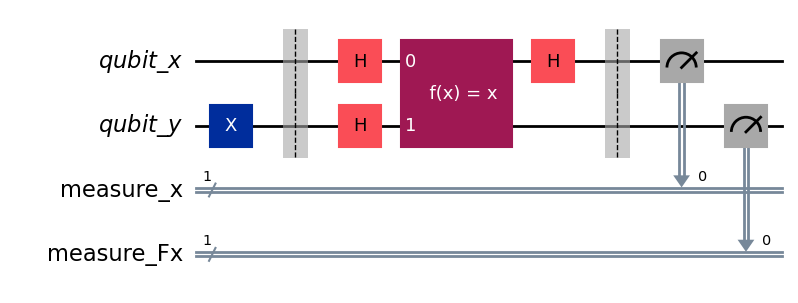

{'1 1': 4106, '0 1': 4086}


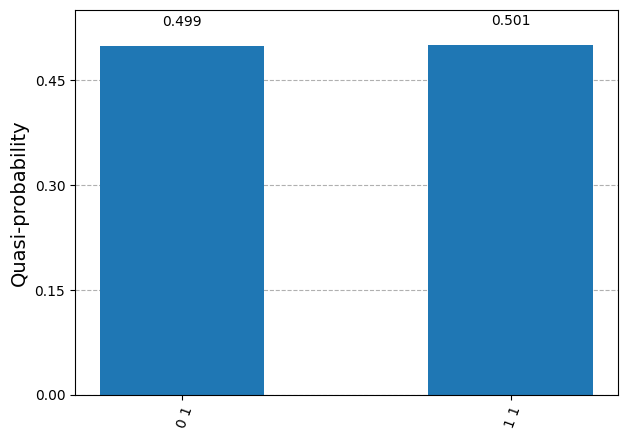

Probando un oracle balanceado: La función f(x) es balanceada .


In [15]:
# Prueba del algoritmo de Deutsch
print("Probando un oracle constante: La función f(x) es", deutsch_algorithm(constant_oracle()), ".")
print("Probando un oracle balanceado: La función f(x) es", deutsch_algorithm(balanced_oracle()), ".")